# Student Segmentation

In [1]:
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from random import randint
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("C:/Users/ginel/OneDrive/Desktop/College - Project/Project and Research Documentation/Analytics/Online Learning - Research.csv")

OldCols = ['Timestamp', 'Kindly fill in your full name', 'What age category do you belong to?', 'Are you a student?',
'Have you ever participated or currently participating in any online learning courses?', 'Do you feel online learning has been helpful considering the current pandemic?',
'Would you like to upgrade your skillset by participating in online learning platforms?', 'How easy is it to find a course of your choice?',
'What challenges do you face while using the online learning platforms? (Select all that applies)', 'Do you think that online learning should continue even after the pandemic?',
'What are your interests (Select all that applies)']

NewCols = ['Date', 'Name', 'Age Group', 'Student', 'Participated in online learning', 'Is online learning helpful', 'Upgrade skills through online learning',
'Ease to pick a course', 'Challenges to pick a course', 'Online learning continue', 'Interest']

for i in range(len(OldCols)):
    data.rename(columns={OldCols[i]: NewCols[i]}, inplace=True)

In [3]:
data.head()

,Date,Name,Age Group,Student,Participated in online learning,Is online learning helpful,Upgrade skills through online learning,Ease to pick a course,Challenges to pick a course,Online learning continue,Interest
0,2021/05/16 8:06:13 pm GMT+5:30,Sneha vijay bhope,18 - 25,Yes,Yes,Yes,Yes,3.0,Enormous course options,Yes,Technology
1,2021/05/16 8:07:33 pm GMT+5:30,Denver D'souza,25 - 35,No,Yes,Yes,Yes,5.0,Don't know where to start;Enormous course opti...,Yes,Finance;Music;Analytics;Accounting
2,2021/05/16 8:08:05 pm GMT+5:30,Kedar Bhope,25 - 35,No,No,NaN,NaN,NaN,NaN,NaN,NaN
3,2021/05/16 8:08:40 pm GMT+5:30,Kedar Bhope,25 - 35,No,No,NaN,NaN,NaN,NaN,NaN,NaN
4,2021/05/16 8:10:08 pm GMT+5:30,Ginelle D'souza,18 - 25,Yes,Yes,Yes,Yes,3.0,Enormous course options;Cost per course,Yes,Analytics;Technology


# Data Analysis

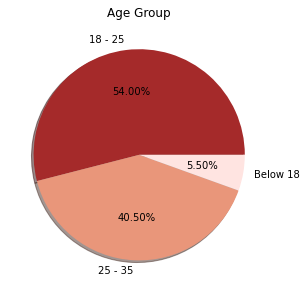

In [4]:
plt.figure(figsize=(5,4))

label = []
value = []

for j in range(len(data['Age Group'].value_counts().index)):
    label.append(data['Age Group'].value_counts().index[j])
    value.append(data['Age Group'].value_counts()[j])
        
plt.pie(value, labels = label,autopct='%1.2f%%',colors=['brown','darksalmon','mistyrose'],shadow=True)
plt.title("Age Group")

plt.tight_layout(pad=0.4)   

The survey conducted consists of students and young professionals majorly in between the age group of 18 - 35 

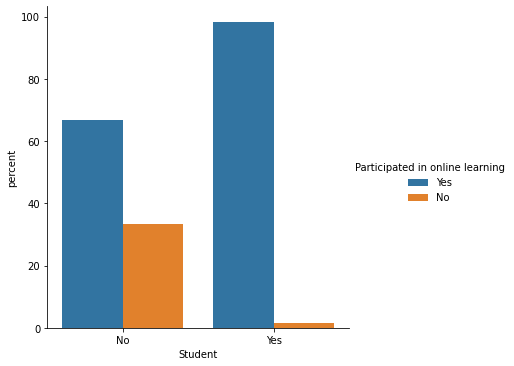

In [5]:
x,y = 'Student', 'Participated in online learning'

df1 = data.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)

66.7% young professionals and 98.4% of students have engaged in online learning. Where an increase in the latter is strikingly high.

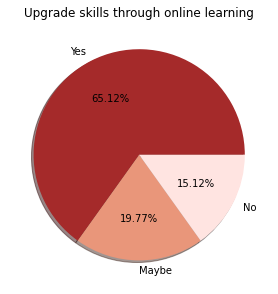

In [6]:
df = data.copy()
df.fillna('',inplace=True)
df = df[df['Upgrade skills through online learning'] != '']

plt.figure(figsize=(5,4))

label = []
value = []

for j in range(len(df['Upgrade skills through online learning'].value_counts().index)):
    label.append(df['Upgrade skills through online learning'].value_counts().index[j])
    value.append(df['Upgrade skills through online learning'].value_counts()[j])
        
plt.pie(value, labels = label,autopct='%1.2f%%',colors=['brown','darksalmon','mistyrose'],shadow=True)
plt.title("Upgrade skills through online learning")

plt.tight_layout(pad=0.4)   

More than three fourth - 65.12% of the youth and professional agree that online learning has been an integral part of upgrading their skills

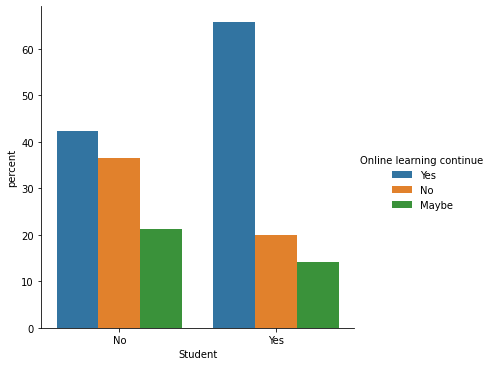

In [7]:
df = data.copy()
df.fillna('',inplace=True)
df = df[df['Online learning continue'] != '']

x,y = 'Student', 'Online learning continue'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)

We observe about 65.8% of students would love to carry on learning, where are the likelihood of professionals to continue is 42.3%. A major factor to this could be **TIME** involved in pursuing these courses.

<AxesSubplot:xlabel='Ease to pick a course', ylabel='count'>

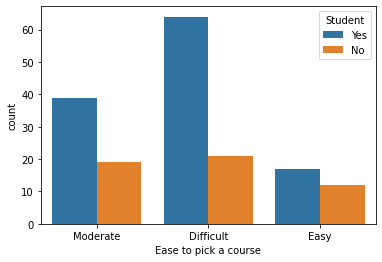

In [8]:
df = data.copy()
df.fillna('',inplace=True)
df = df[df['Ease to pick a course'] != '']

df['Ease to pick a course'] = df['Ease to pick a course'].apply(lambda x : "Not Applicable" if x==0 else ("Easy" if (x!= 0) and (x<=2) else ("Moderate" if x==3 else "Difficult")))

sns.countplot(x='Ease to pick a course',hue='Student',data=df)

Talking about the ability of students and professionals to be able to pick a course we observe that there is a steep drop of comfort among students to be able to pick up a course. They find it difficult to choose a course due to lack of “Knowledge”. Professional on the other hand find a sound place between difficulty and neutrality.

<AxesSubplot:xlabel='User Challenges', ylabel='count'>

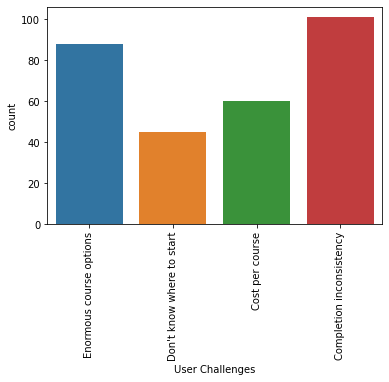

In [9]:
df = data.copy()
df.fillna('',inplace=True)

for j in range(len(df['Challenges to pick a course'])):
    column = df['Challenges to pick a course'][j].split(";")
    for value in column:
        df.loc[df.index == j, value.strip()] = value.strip()
        
dropcolumns = ['Date', 'Age Group', 'Student','Participated in online learning', 'Is online learning helpful',
               'Upgrade skills through online learning', 'Ease to pick a course', 'Challenges to pick a course', 
               'Online learning continue', 'Interest']

df.drop(dropcolumns,inplace=True,axis=1)

permanent = df.columns[:1].tolist()
temporary = df.columns[1:].tolist()

final = pd.melt(df, id_vars=permanent, value_vars=temporary)
final = final[final['value'].notna()]

final.drop('variable',inplace=True,axis=1)
final.rename(columns={"value": "User Challenges"}, inplace=True)
final = final[final['User Challenges'] != '']

plt.xticks(rotation=90)

sns.countplot(x='User Challenges',data=final)

The major challenge faced by learners is course completion inconsistencies and massive course options

<AxesSubplot:xlabel='User Interest', ylabel='count'>

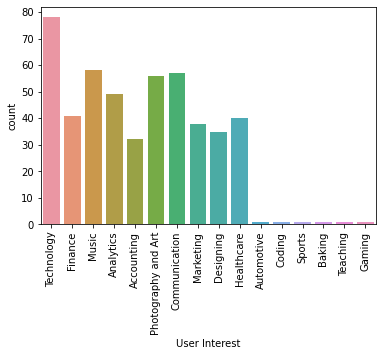

In [10]:
df = data.copy()
df.fillna('',inplace=True)

for j in range(len(df['Interest'])):
    column = df['Interest'][j].split(";")
    for value in column:
        df.loc[df.index == j, value.strip()] = value.strip()
        
dropcolumns = ['Date', 'Age Group', 'Student','Participated in online learning', 'Is online learning helpful',
               'Upgrade skills through online learning', 'Ease to pick a course', 'Challenges to pick a course', 
               'Online learning continue', 'Interest']

df.drop(dropcolumns,inplace=True,axis=1)

permanent = df.columns[:1].tolist()
temporary = df.columns[1:].tolist()

final = pd.melt(df, id_vars=permanent, value_vars=temporary)
final = final[final['value'].notna()]

final.drop('variable',inplace=True,axis=1)
final.rename(columns={"value": "User Interest"}, inplace=True)
final = final[final['User Interest'] != '']

plt.xticks(rotation=90)

sns.countplot(x='User Interest',data=final)

A number of interests are collected from the individual, thus providing a base for grouping along with the above known information. Here, we see that a mahority of persons have their interest in the field of techonology.

# Data Modeling

In [11]:
data = pd.read_csv("C:/Users/ginel/OneDrive/Desktop/College - Project/Project and Research Documentation/Analytics/Online Learning - Research.csv")

data['What challenges do you face while using the online learning platforms? (Select all that applies)'].fillna('',inplace=True)
data['What are your interests (Select all that applies)'].fillna('',inplace=True)

data['What challenges do you face while using the online learning platforms? (Select all that applies)'] = data['What challenges do you face while using the online learning platforms? (Select all that applies)'].apply(lambda x : x.replace("Don't","Do not"))

cols = ['Are you a student?','Have you ever participated or currently participating in any online learning courses?',
        'Do you feel online learning has been helpful considering the current pandemic?','Would you like to upgrade your skillset by participating in online learning platforms?',
        'Do you think that online learning should continue even after the pandemic?']

data.fillna(0,inplace=True)

for i in cols:
    data[i] = data[i].apply(lambda x : 1 if x == "Yes" else 0)

data['How easy is it to find a course of your choice?'] = data['How easy is it to find a course of your choice?'].apply(lambda x : "Not Applicable" if x==0 else ("Easy" if (x!= 0) and (x<=2) else ("Moderate" if x==3 else "Difficult")))

cols = ['What challenges do you face while using the online learning platforms? (Select all that applies)','What are your interests (Select all that applies)']

for i in cols:
    for j in range(len(data[i])):
        column = data[i][j].split(";")
        for value in column:
            data.loc[data.index == j, value.strip().title()] = 1

for j in range(len(data['What age category do you belong to?'])):
    cols = "Age: " + str(data['What age category do you belong to?'][j])
    data.loc[data.index == j, cols] = 1
    
for j in range(len(data['How easy is it to find a course of your choice?'])):
    cols = "Find: " + str(data['How easy is it to find a course of your choice?'][j])
    data.loc[data.index == j, cols] = 1
    
data.fillna(0,inplace=True)

data.drop(['Timestamp','What age category do you belong to?','How easy is it to find a course of your choice?','What challenges do you face while using the online learning platforms? (Select all that applies)','What are your interests (Select all that applies)',''],axis=1,inplace=True)

for col in data.columns[2:]:
    data[col] = data[col].astype("int64")
    
data = data.set_index('Kindly fill in your full name')

In [12]:
data.head()

,Are you a student?,Have you ever participated or currently participating in any online learning courses?,Do you feel online learning has been helpful considering the current pandemic?,Would you like to upgrade your skillset by participating in online learning platforms?,Do you think that online learning should continue even after the pandemic?,Enormous Course Options,Do Not Know Where To Start,Cost Per Course,Completion Inconsistency,Technology,...,Baking,Teaching,Gaming,Age: 18 - 25,Age: 25 - 35,Age: Below 18,Find: Moderate,Find: Difficult,Find: Not Applicable,Find: Easy
Kindly fill in your full name,,,,,,,,,,,,,,,,,,,,,
Sneha vijay bhope,1,1,1,1,1,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
Denver D'souza,0,1,1,1,1,1,1,1,0,0,...,0,0,0,0,1,0,0,1,0,0
Kedar Bhope,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
Kedar Bhope,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
Ginelle D'souza,1,1,1,1,1,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0


Within the data collected we observe that we have a several columns each of which is essential to group students of similar interest. Thus, through Principal component analysis (PCA) we will reduce the dimensionality of the datasets, increasing interpretability but at the same time minimizing information loss.

In [13]:
#Example of column reduction from 32 columns to 6 columns

from sklearn.decomposition import PCA

pca = PCA(n_components=6)
pca.fit(data)
pca_samples = pca.transform(data)

ps = pd.DataFrame(pca_samples)
ps.head()

,0,1,2,3,4,5
0,-0.717672,-0.086850,-0.519002,-0.577458,1.182239,0.511338
1,-0.108246,0.970265,1.504706,-0.283103,0.105768,-0.608066
2,2.144503,-0.496924,0.130815,0.063459,0.383062,-0.043782
3,2.144503,-0.496924,0.130815,0.063459,0.383062,-0.043782
4,-0.826204,0.400595,-0.633648,-0.629753,1.034120,-0.048162


Once the dimensions are reduced we will make use of K-Means clustering to group students with similar interest. K-Means Clustering is an Unsupervised Learning algorithm that groups similar dataset into several cluster. The letter "K" in K-Means Clustering defines the number of pre-defined  cluster we need to  maintain within the dataset.

(200, 2)
          2         1
0 -0.519002 -0.086850
1  1.504706  0.970265
2  0.130815 -0.496924
3  0.130815 -0.496924
4 -0.633648  0.400595


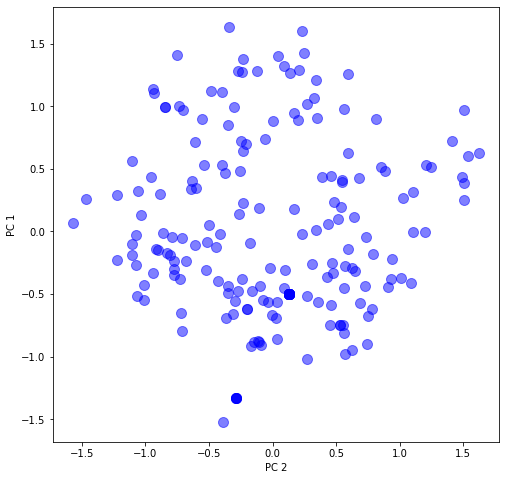

In [14]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

tocluster = pd.DataFrame(ps[[2,1]])
print (tocluster.shape)
print (tocluster.head())

fig = plt.figure(figsize=(8,8))
plt.plot(tocluster[2], tocluster[1], 'o', markersize=10, color='blue', alpha=0.5, label='class1')

plt.xlabel('PC 2')
plt.ylabel('PC 1')
plt.show()

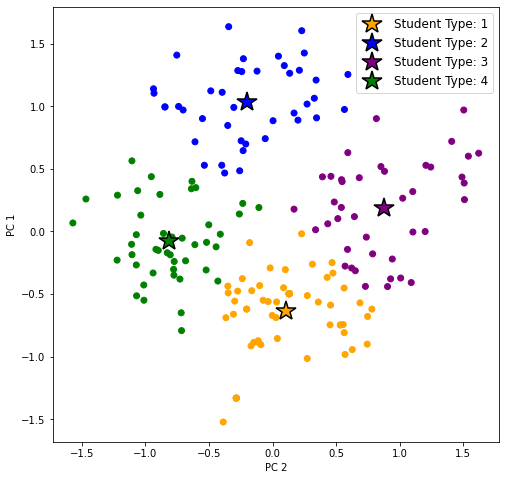

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusterer = KMeans(n_clusters=4,random_state=42).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)

import matplotlib
fig = plt.figure(figsize=(8,8))
colors = ['orange','blue','purple','green']
clusters = ['Student Type: 1','Student Type: 2','Student Type: 3','Student Type: 4']
colored = [colors[k] for k in c_preds]

plt.scatter(tocluster[2],tocluster[1],  color = colored)

for ci,c in enumerate(centers):
    plt.plot(c[0], c[1], '*', markersize=20, color=colors[ci],  label=''+str(clusters[ci]),markeredgewidth=1.5,markeredgecolor='black')

plt.xlabel('PC 2')
plt.ylabel('PC 1')
plt.legend(fontsize=12)
plt.show()

Thus with the help of K-Means clustering we have created 4 clusters of students having similar interest